In [6]:
import tensorflow as tf
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
categories = ["CNV" , "DME" , "DRUSEN" , "NORMAL" ]


In [8]:
model = tf.keras.models.load_model(r'C:\Users\asus\My Python Stuff\Lord_xception100epoch.h5')

In [9]:
def prepareImage(pathForImage):
    image = load_img(pathForImage , target_size=(128,128))
    imgResult = img_to_array(image)
    imgResult = np.expand_dims(imgResult , axis = 0)
    imgResult = imgResult / 255. 
    return imgResult

In [10]:
testImagePath = r'E:\Documents\Docs\Pradeesh\Academic\VESIT\CNN_project\OCT2017\testnew\DRUSEN\DRUSEN-1225603-1.jpeg'
# prepare the image using our function
imgForModel = prepareImage(testImagePath)

@tf.function
def predict_with_model(model, x):
    return model(x)

resultArray = predict_with_model(model, imgForModel)
#print (resultArray)

# the highest value is the predicted value and we need the index in the resultArray
answer = np.argmax(resultArray, axis=1)
print (answer)

index = answer[0]

print ("this image is : "+ categories[ index ]);


[2]
this image is : DRUSEN


In [11]:
# Load and preprocess your test dataset, including test_images and test_labels
# Replace the following lines with your actual code for loading and preprocessing the data

# Example:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory path to your test data
test_data_dir = r'E:\Documents\Docs\Pradeesh\Academic\VESIT\CNN_project\OCT2017\testnew'

# Define the image size and batch size
image_size = (128, 128)
batch_size = 32

# Use ImageDataGenerator to load and preprocess the test data
test_data_generator = ImageDataGenerator(rescale=1.0 / 255.0)  # You can add more preprocessing options as needed
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' if you have multiple classes
    shuffle=False  # Do not shuffle the test data
)

# Use the model to predict labels for the test data
predicted_labels = model.predict(test_generator)

# Convert predicted labels to actual class indices (use argmax)
predicted_indices = np.argmax(predicted_labels, axis=1)

# Get the actual labels from the test data generator
actual_indices = test_generator.classes

# Calculate the accuracy in percentage format
correct_predictions = np.sum(predicted_indices == actual_indices)
total_test_images = len(actual_indices)
accuracy_percent = (correct_predictions / total_test_images) * 100

print(f"Total Test Images: {total_test_images}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Test Accuracy: {accuracy_percent:.2f}%")


Found 3112 images belonging to 4 classes.
98/98 [==============================] - 432s 4s/step
Total Test Images: 3112
Correct Predictions: 2673
Test Accuracy: 85.89%


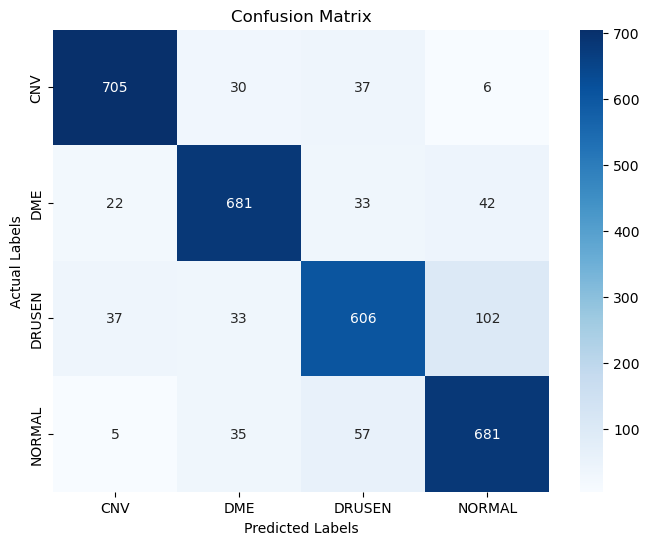

Classification Report:
              precision    recall  f1-score   support

         CNV       0.92      0.91      0.91       778
         DME       0.87      0.88      0.87       778
      DRUSEN       0.83      0.78      0.80       778
      NORMAL       0.82      0.88      0.85       778

    accuracy                           0.86      3112
   macro avg       0.86      0.86      0.86      3112
weighted avg       0.86      0.86      0.86      3112



In [8]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_indices, predicted_indices)

# Plot the colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Calculate precision, recall, and F1 score
classification_rep = classification_report(actual_indices, predicted_indices, target_names=categories)

# Print or use the calculated values
print("Classification Report:")
print(classification_rep)

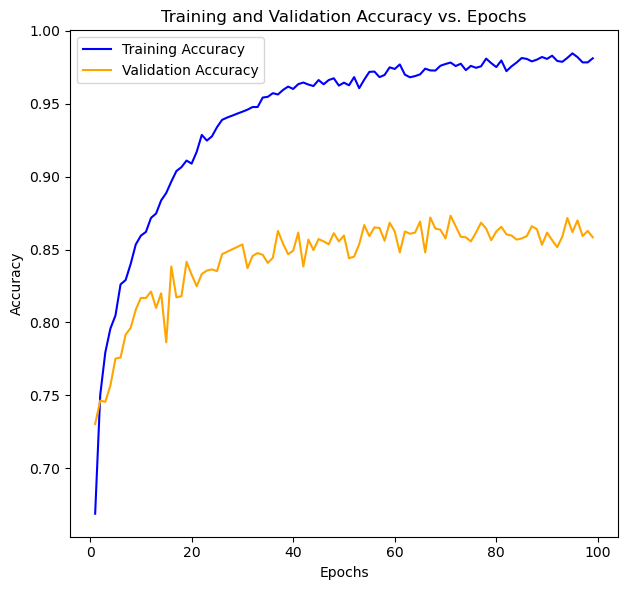

In [2]:
train_loss = [0.8350, 0.6307, 0.5695, 0.5237, 0.4972, 0.4459, 0.4365, 0.4111, 0.3815, 0.3640, 0.3438, 0.3311, 0.3224, 0.3000, 0.2873, 0.2662, 0.2499, 0.2443, 0.2318, 0.2351, 0.2119, 0.1928, 0.1984, 0.1928, 0.1711, 0.1640, 0.1605, 0.1572, 0.1540, 0.1508, 0.1435, 0.1378, 0.1361, 0.1206, 0.1232, 0.1164, 0.1128, 0.1102, 0.1106, 0.111, 0.0993, 0.1, 0.0962, 0.1064, 0.0893, 0.098, 0.09, 0.0892, 0.0995, 0.0959, 0.0975, 0.091, 0.1029, 0.0913, 0.0724, 0.0748, 0.0824, 0.0785, 0.066, 0.0698, 0.0654, 0.0811, 0.0836, 0.0833, 0.0761, 0.072, 0.0747, 0.0782, 0.0704, 0.0659, 0.0593, 0.0703, 0.06, 0.07, 0.0714, 0.0705, 0.0639, 0.0524, 0.0619, 0.0675, 0.058, 0.0773, 0.0713, 0.059, 0.0483, 0.0534, 0.0592, 0.0597, 0.0513, 0.0534, 0.0537, 0.0592, 0.0621, 0.0527, 0.0402, 0.0531, 0.0634, 0.0576, 0.0557]

train_accuracy = [0.6689, 0.7504, 0.7795, 0.7958, 0.8048, 0.8261, 0.8291, 0.8402, 0.8535, 0.8595, 0.8621, 0.8717, 0.8747, 0.8837, 0.8888, 0.8966, 0.9038, 0.9065, 0.9110, 0.9089, 0.9170, 0.9286, 0.9247, 0.9276, 0.9339, 0.9389, 0.9405, 0.9418, 0.9432, 0.9445, 0.9459, 0.9477, 0.9477, 0.9542, 0.9547, 0.9572, 0.9563, 0.9594, 0.9617, 0.9601, 0.9634, 0.9645, 0.9631, 0.9621, 0.9662, 0.9633, 0.9662, 0.9674, 0.9624, 0.9644, 0.9626, 0.9682, 0.9606, 0.9665, 0.9718, 0.9720, 0.9682, 0.9697, 0.9749, 0.9738, 0.9769, 0.9699, 0.9681, 0.9689, 0.9701, 0.9740, 0.9728, 0.9727, 0.9760, 0.9772, 0.9782, 0.9758, 0.9774, 0.9730, 0.9759, 0.9746, 0.9756, 0.9809, 0.9778, 0.9751, 0.9796, 0.9723, 0.9756, 0.9782, 0.9813, 0.9807, 0.9790, 0.9802, 0.9820, 0.9807, 0.9829, 0.9793, 0.9787, 0.9814, 0.9845, 0.9819, 0.9783, 0.9783, 0.9811]

val_loss = [0.6795, 0.6233, 0.6242, 0.6053, 0.5475, 0.5860, 0.5509, 0.5231, 0.5124, 0.4681, 0.4953, 0.4854, 0.5260, 0.4794, 0.5867, 0.4549, 0.5162, 0.5133, 0.4395, 0.4737, 0.5559, 0.4897, 0.4910, 0.4887, 0.4932, 0.4776, 0.4732, 0.4689, 0.4647, 0.4605, 0.5326, 0.5142, 0.5066, 0.5572, 0.5470, 0.5644, 0.5191, 0.5552, 0.5291, 0.5656, 0.4965, 0.6212, 0.5331, 0.5729, 0.5884, 0.558, 0.6033, 0.573, 0.5607, 0.5653, 0.6473, 0.6325, 0.6104, 0.528, 0.6004, 0.5582, 0.6004, 0.614, 0.587, 0.5639, 0.7076, 0.632, 0.5856, 0.66, 0.5927, 0.646, 0.6187, 0.6633, 0.6018, 0.6246, 0.6122, 0.586, 0.6631, 0.6302, 0.7236, 0.6701, 0.6214, 0.6508, 0.7568, 0.6776, 0.6658, 0.6882, 0.6744, 0.7366, 0.7312, 0.7121, 0.6755, 0.724, 0.7935, 0.8051, 0.7369, 0.8102, 0.7607, 0.7259, 0.7869, 0.6595, 0.75, 0.6824, 0.7476]

val_accuracy = [0.7304, 0.7464, 0.7456, 0.7568, 0.7752, 0.7760, 0.7916, 0.7964, 0.8088, 0.8168, 0.8168, 0.8212, 0.8100, 0.8200, 0.7864, 0.8384, 0.8172, 0.8180, 0.8416, 0.8328, 0.8248, 0.8332, 0.8356, 0.8364, 0.8352, 0.8468, 0.8485, 0.8502, 0.8518, 0.8535, 0.8372, 0.8456, 0.8476, 0.8464, 0.8408, 0.8444, 0.8628, 0.8540, 0.8468, 0.8492, 0.8616, 0.8384, 0.8568, 0.8496, 0.8572, 0.8556, 0.8536, 0.8612, 0.8556, 0.8596, 0.844, 0.8452, 0.8536, 0.8668, 0.8592, 0.8652, 0.8648, 0.856, 0.8684, 0.8624, 0.848, 0.8624, 0.8608, 0.8616, 0.8692, 0.848, 0.872, 0.8644, 0.8636, 0.8576, 0.8732, 0.866, 0.8588, 0.8584, 0.8556, 0.8616, 0.8684, 0.8644, 0.8564, 0.8624, 0.8656, 0.8604, 0.8596, 0.8568, 0.8576, 0.8592, 0.866, 0.864, 0.8532, 0.8616, 0.8564, 0.8516, 0.8588, 0.8716, 0.862, 0.87, 0.8592, 0.8628, 0.8584]

# Lists containing training and validation loss values for each epoch
epochs = range(1, len(train_accuracy) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', linestyle='-', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', linestyle='-', color='orange')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()